
<h1 align=center><font size = 5>Car prices - 2</font></h1>

### Welcome!
Dans cette section, nous allons voir plusieurs techniques permettant de déterminer l'importance relative des caratéristiques sur la cible : le prix.

### Quelles sont les caractéristiques qui ont le plus d'impact sur le prix ?

## 1. Import Des données

In [1]:
import pandas as pd
import numpy as np

In [2]:
source='clean_df.csv'

df = pd.read_csv(source, index_col=0)
df.head()

symboling  normalized-losses        marke num-of-doors   body-style  \
0          3                122  alfa-romero          two  convertible   
1          1                122  alfa-romero          two    hatchback   
2          2                164         audi         four        sedan   
3          2                164         audi         four        sedan   
4          2                122         audi          two        sedan   

  drive-wheels engine-location  wheel-base    length     width  ...  stroke  \
0          rwd           front        88.6 -0.439616 -0.855008  ...    2.68   
1          rwd           front        94.5 -0.245239 -0.189262  ...    3.47   
2          fwd           front        99.8  0.192109  0.143611  ...    3.40   
3          4wd           front        99.4  0.192109  0.238717  ...    3.40   
4          fwd           front        99.8  0.248803  0.191164  ...    3.40   

   compression-ratio horsepower peak-rpm  city-L/100km highway-L/100km  \
0                9.0        111   5000.0     11.190476        8.703704   
1                9.0        154   5000.0     12.368421        9.038462   
2               10.0        102   5500.0      9.791667        7.833333   
3                8.0        115   5500.0     13.055556       10.681818   
4                8.5        110   5500.0     12.368421        9.400000   

     price  horsepower-groupe  fuel-type_gas  aspiration_turbo  
0  16500.0             faible              1                 0  
1  16500.0            Moyenne              1                 0  
2  13950.0             faible              1                 0  
3  17450.0             faible              1                 0  
4  15250.0             faible              1                 0  

[5 rows x 27 columns]

## 2. Analyse graphique des caractéristiques

 Import de "Matplotlib" et "Seaborn".

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### choix de la méthode de visualisation :
Il est important de choisir la bonne méthode selon le type de variable proposé par le dataset.


In [4]:
# list the data types for each column
df.dtypes

symboling              int64
normalized-losses      int64
marke                 object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                float64
horsepower-groupe     object
fuel-type_gas          int64
aspiration_turbo       int64
dtype: object

Calcul des coefficients de corrélation entre les colonnes de type numérique :

In [5]:
df.corr()['price'].sort_values()

fuel-type_gas       -0.110417
peak-rpm            -0.101593
symboling           -0.083327
compression-ratio    0.071176
stroke               0.083298
normalized-losses    0.133999
height               0.137284
aspiration_turbo     0.179762
bore                 0.543433
wheel-base           0.589147
length               0.691044
width                0.752795
city-L/100km         0.790291
highway-L/100km      0.801313
horsepower           0.809657
curb-weight          0.834420
engine-size          0.872337
price                1.000000
Name: price, dtype: float64

## Variables continues
La corrélation entre les variables numériques et la colonne cible peut être étudiée grâce aux nuages de points : les `regplot` .

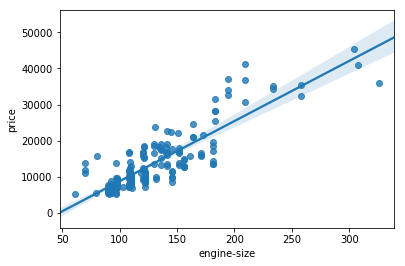

In [13]:
# Engine size et price
sns.regplot(x="engine-size", y="price", data=df)

Calcul du coefficient de corrélation :

In [6]:
df[["engine-size", "price"]].corr()

engine-size     price
engine-size     1.000000  0.872337
price           0.872337  1.000000

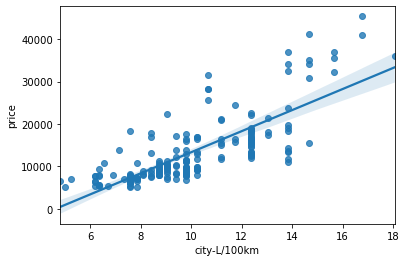

In [7]:
#highway-L/100km et price
sns.regplot(x="city-L/100km", y="price", data=df)

In [8]:
df[['highway-L/100km', 'price']].corr()

highway-L/100km     price
highway-L/100km         1.000000  0.801313
price                   0.801313  1.000000

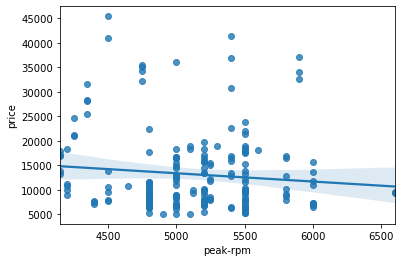

In [9]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [10]:
df[['peak-rpm','price']].corr()

peak-rpm     price
peak-rpm  1.000000 -0.101593
price    -0.101593  1.000000

La colonne 'peak-rpm' semble ête de faible influence sur la cible 'price'

In [11]:
df[['stroke','price']].corr()

stroke     price
stroke  1.000000  0.083298
price   0.083298  1.000000

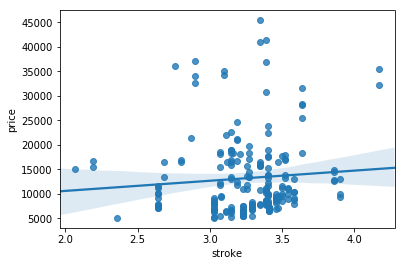

In [22]:
sns.regplot(x='stroke',y='price',data=df)

## Variables catégoriques

C'est avec les boxplot que l'influence des varibles catégoriques sera étudiée.

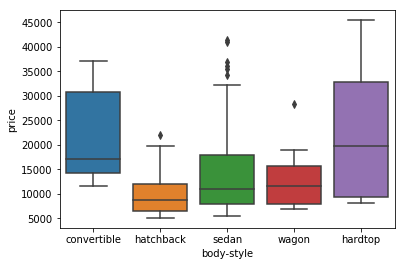

In [23]:
#body-style et price
sns.boxplot(x="body-style", y="price", data=df)

La caractéristique 'body-style' semble être un bon prédicteur de la colonne "price" :

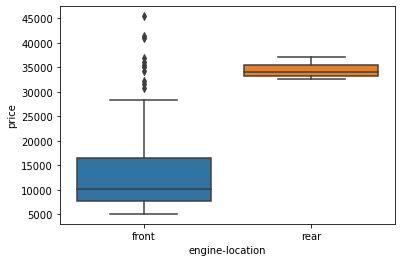

In [12]:
sns.boxplot(x="engine-location", y="price", data=df)

La colonne engine-location semble aussi être un très bon prédicteur de price. 

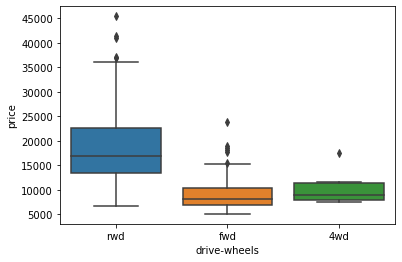

In [13]:
sns.boxplot(x="drive-wheels", y="price", data=df)

## 5. Correlation

## Correlation de Pearson
La Correlation de Pearson mesure la dépendence linéaire entre 2 variables, X et Y.
Le coefficient résultant est une valeur entre -1 et 1 :
- **1**: corrélation positive totale,
- **0**: aucune corrélation, les deux variables n'ont aucune influence l'une sur l'autre
- **-1**: negative linéaire totale.

Il existe une seconde mesure permettant de qualifier cette corrélation  : test de significativité

**P-value**:<br> 
En français, p-valeur, est une mesure de la probabilité que la dépendance (la corrélation) entre deux variables soit statistiquement signifiante. Le niveau requis est de 0.05 qui signifie qu'on accorde 95% de confiance à la corrélation obtenue.

Par convention, lorsque p-value est:
- < 0.001 probabilité très forte
- < 0.05; probabilité moyenne mais acceptable
- < 0.1; tprobabilité faible
- Plus que 0.1: aucune chance !

C'est dans la librairie stats de "scipy"  que l'on trouve la fonction donnant la p-valeur.:

In [14]:
from scipy import stats

### Calcul de quelque p-valeurs

In [16]:
#Wheel-base vs Price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Coefficient de correlation wheel-base :", pearson_coef, " avec P-value =", p_value)
#Horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("Coefficient de correlation horsepower:", pearson_coef, " avec P-value =", p_value) 
#Length vs price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("Coefficient de correlation length:", pearson_coef, " avec P-value =", p_value) 

Coefficient de correlation wheel-base : 0.5891470005448702  avec P-value = 4.4570195020504053e-20
Coefficient de correlation horsepower: 0.8096565575365612  avec P-value = 1.0468839625927006e-47
Coefficient de correlation length: 0.6910440897821905  avec P-value = 9.960963222348607e-30


##### Conclusion: 
Les p-value sont < 0.001, les correlations obtenues sont donc statistiquement très signifiantes même si parfois le coefficient de corrélation l'indique moins (0,58..)

## Conclusion:  Variables retenues

On peut, maintenant restreindre la liste de variables à celles qui ont le plus d'iparct sur la cible price :

Variables numériques continues
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-L/100km
- Highway-L/100km
- Wheel-base
- Bore

Variables catégoriques
- Drive-wheels
- Make


In [21]:
df.columns

Index(['symboling', 'normalized-losses', 'marke', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price',
       'horsepower-groupe', 'fuel-type_gas', 'aspiration_turbo'],
      dtype='object')

In [23]:
df_final =df[['length','width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km',
              'highway-L/100km','wheel-base','bore','drive-wheels','marke','price']]
df_final = pd.get_dummies(df_final, columns=['marke'], drop_first=True)
df_final = pd.get_dummies(df_final, columns=['drive-wheels'], drop_first=True)
df_final.head()

length     width  curb-weight  engine-size  horsepower  city-L/100km  \
0 -0.439616 -0.855008         2548          130         111     11.190476   
1 -0.245239 -0.189262         2823          152         154     12.368421   
2  0.192109  0.143611         2337          109         102      9.791667   
3  0.192109  0.238717         2824          136         115     13.055556   
4  0.248803  0.191164         2507          136         110     12.368421   

   highway-L/100km  wheel-base  bore    price  ...  marke_plymouth  \
0         8.703704        88.6  3.47  16500.0  ...               0   
1         9.038462        94.5  2.68  16500.0  ...               0   
2         7.833333        99.8  3.19  13950.0  ...               0   
3        10.681818        99.4  3.19  17450.0  ...               0   
4         9.400000        99.8  3.19  15250.0  ...               0   

   marke_porsche  marke_renault  marke_saab  marke_subaru  marke_toyota  \
0              0              0           0             0             0   
1              0              0           0             0             0   
2              0              0           0             0             0   
3              0              0           0             0             0   
4              0              0           0             0             0   

   marke_volkswagen  marke_volvo  drive-wheels_fwd  drive-wheels_rwd  
0                 0            0                 0                 1  
1                 0            0                 0                 1  
2                 0            0                 1                 0  
3                 0            0                 0                 0  
4                 0            0                 1                 0  

[5 rows x 33 columns]

In [24]:
df_final.to_csv("cars_final.csv")

### JPP

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND